In [1]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
class_names = iris.target_names

print("Feature names: ", feature_names)
print("Class names: ", class_names)
print("X size (features): ", X.shape)
print("y size (target): ", y.shape)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names:  ['setosa' 'versicolor' 'virginica']
X size (features):  (150, 4)
y size (target):  (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Num of sample in train set: ", len(X_train))
print("Num of sample in test set: ", len(X_test))

Num of sample in train set:  105
Num of sample in Test set:  45


In [8]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
print("Training...")
clf.fit(X_train, y_train)
print("Training complete!")

Training...
Training complete!


In [9]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Predicted result (y_pred): {y_pred}")
print(f"Real result (y_test): {y_test}")
print(f"Accuracy in test set: {accuracy*100:.2f}%")

Predicted result (y_pred): [1 0 2 1 1 0 1 2 1 1 1 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Real result (y_test): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy in test set: 97.78%


Drawing decision tree...


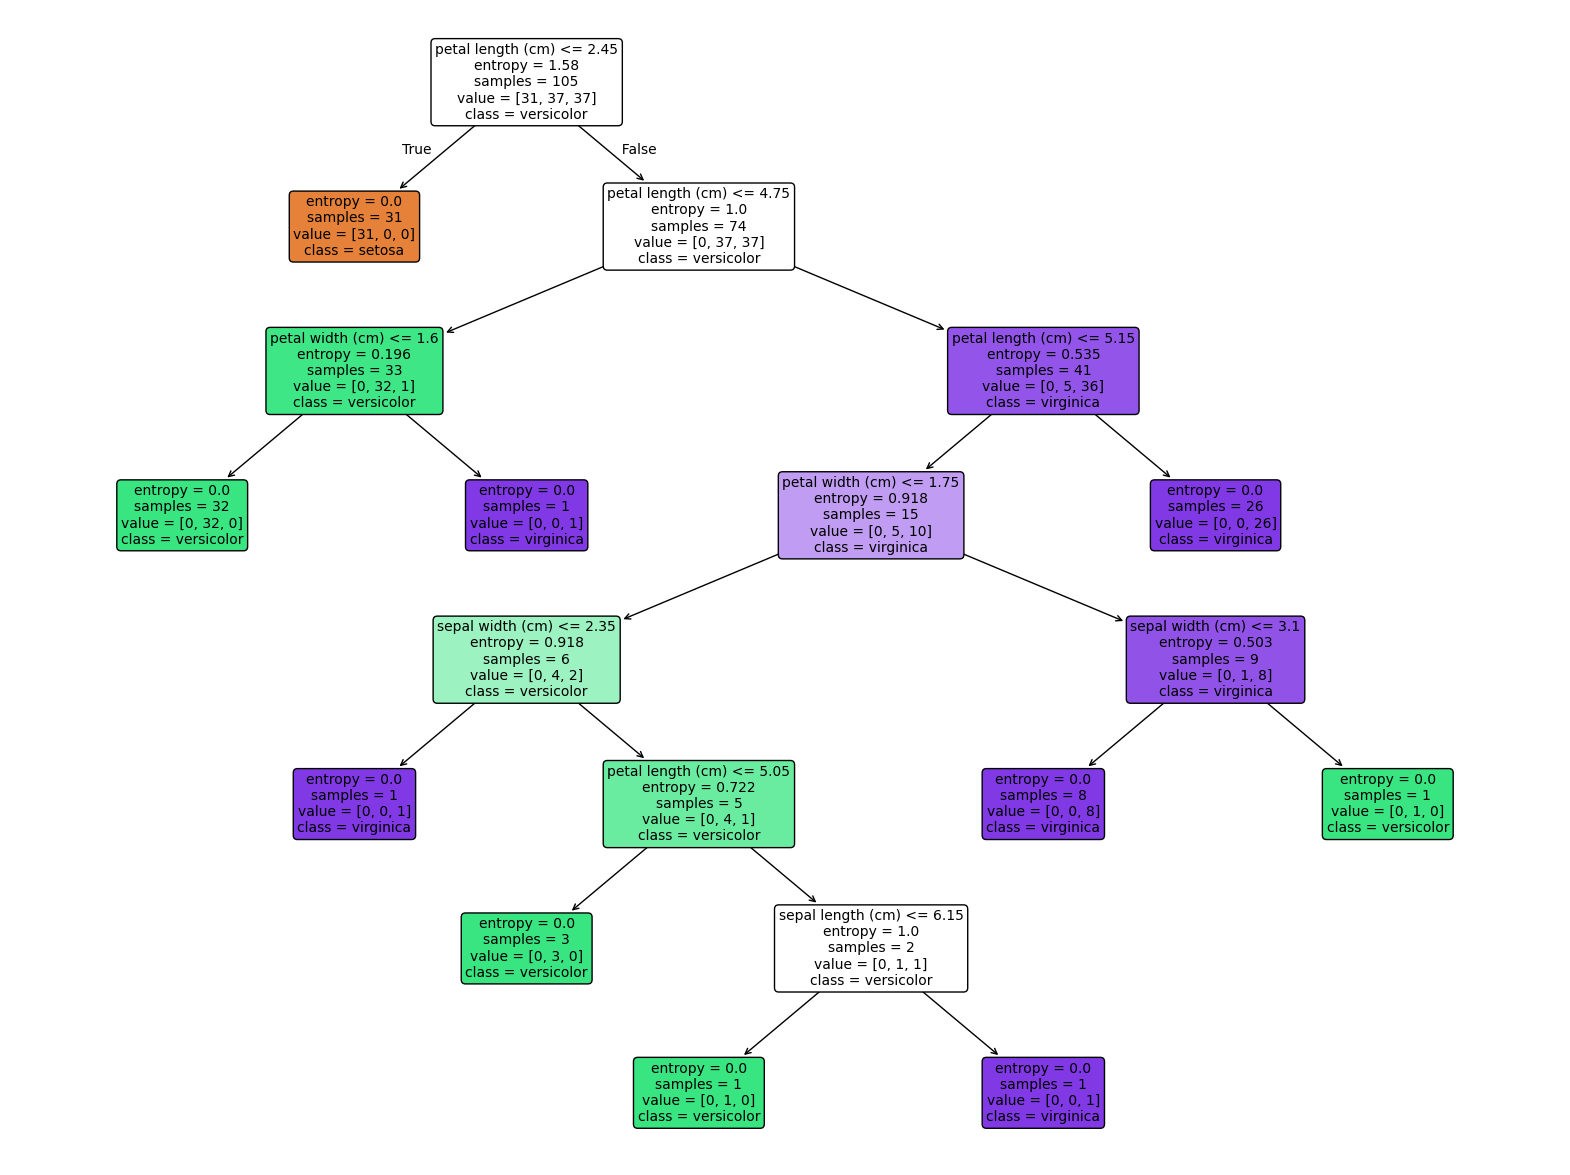

In [10]:
print("Drawing decision tree...")
plt.figure(figsize=(20,15))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

Training pruned tree (max_depth = 3)...
Accuracy (Pruned): 97.78%
Drawing pruned tree...


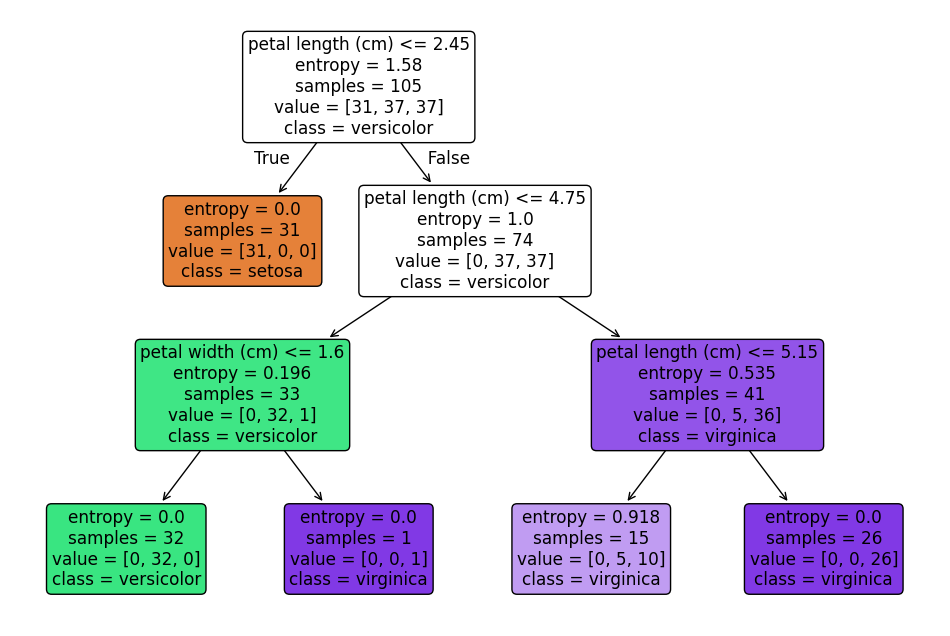

In [11]:
# Initiate a new model, restrict the depth
# The tree's depth is maximum 3
clf_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
print("Training pruned tree (max_depth = 3)...")
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy (Pruned): {accuracy_pruned * 100:.2f}%")
print("Drawing pruned tree...")
plt.figure(figsize=(12, 8))
plot_tree(
    clf_pruned,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
)
plt.show()